In [1]:
using Pkg
pkg"activate ."

In [2]:
using PerlaTonettiWaugh, LinearAlgebra, Plots, BenchmarkTools, Interpolations, QuadGK, DifferentialEquations, BlackBoxOptim, Optim, Dierckx, DataFrames

# Steady states

## Solving steady state solutions

Set up parameters and find the corresponding stationary solution:

In [3]:
z_min = 0.0 
z_max = 5.0
M = 200
z_grid = range(z_min, stop = z_max, length = M) # Since we only care about the grid. 

# Define common objects. 
d_0 = 5
d_T = 2.3701
params = (ρ = 0.02, σ = 4.2508, N = 10, θ = 5.1269, γ = 1.00, κ = 0.013, ζ = 1, η = 0, Theta = 1, χ = 1/(2.1868), υ = 0.0593, μ = 0, δ = 0.053) # Baselines per Jesse. 
δ = params.δ
# solve for stationary solution at t = 0
params_0 = merge(params, (d = d_0,)) # parameters to be used at t = 0
params_T = merge(params, (d = d_T,)) # parameters to be used at t = T


stationary_sol_0 = stationary_numerical(params_0, z_grid) # solution at t = 0
stationary_sol = stationary_numerical(params_T, z_grid) # solution at t = T

(F = getfield(PerlaTonettiWaugh, Symbol("#F#19")){Float64}(5.1269), r = 0.09689665244308684, ν = 2.569167110812626, a = 7.569871945827518, b = 0.1879601382805945, S = 0.07630009541369748, L_tilde = 0.20352197650091955, z_bar = 1.4525618351718148, w = 0.3417149325237167, x = 1.0, π_min = 0.07279747110268761, g = 0.02389665244308684, z_hat = 1.3951350964853995, Ω = 0.9536180359512142, v_tilde = [1.1868, 1.10275, 1.0299, 0.966776, 0.91213, 0.864875, 0.824087, 0.788984, 0.758912, 0.733341  …  0.841029, 0.837426, 0.832533, 0.825889, 0.816866, 0.804612, 0.78797, 0.76537, 0.734679, 0.692999], π_bar_agg = 0.2247737330458511, y = 1.1569335794878441, c = 1.1569335794878441, λ_ii = 0.774294308114461, U_bar = getfield(PerlaTonettiWaugh, Symbol("##17#18")){Float64,Float64,Float64,Float64}(0.02389665244308684, 0.02, 1.0, 1.1569335794878441))

## Welfare in steady states

In [4]:
# auxil. function that extracts and displays welfare information from steady state solutions
function display_stationary_sol(stationary_sol)
    @unpack g, z_hat, Ω, π_bar_agg, y, c, λ_ii, U_bar, L_tilde, z_bar, w, x, π_min, r, a, b, S = stationary_sol
    summary_df1 = DataFrame(g = g, z_hat = z_hat, Ω = Ω, π_bar_agg = π_bar_agg, 
                            y = y, c = c, λ_ii = λ_ii)
    summary_df2 = DataFrame(U_bar_0 = U_bar(0.0),
                            L_tilde = L_tilde, z_bar = z_bar, w = w, x = x, π_min = π_min)
    summary_df3 = DataFrame(r = r, a = a, b = b, S = S)
    println(summary_df1)
    println(summary_df2)    
    println(summary_df3)
end;

### Steady state at `T`

In [5]:
display_stationary_sol(stationary_sol)

1×7 DataFrame
│ Row │ g         │ z_hat   │ Ω        │ π_bar_agg │ y       │ c       │ λ_ii     │
│     │ Float64   │ Float64 │ Float64  │ Float64   │ Float64 │ Float64 │ Float64  │
├─────┼───────────┼─────────┼──────────┼───────────┼─────────┼─────────┼──────────┤
│ 1   │ 0.0238967 │ 1.39514 │ 0.953618 │ 0.224774  │ 1.15693 │ 1.15693 │ 0.774294 │
1×6 DataFrame
│ Row │ U_bar_0 │ L_tilde  │ z_bar   │ w        │ x       │ π_min     │
│     │ Float64 │ Float64  │ Float64 │ Float64  │ Float64 │ Float64   │
├─────┼─────────┼──────────┼─────────┼──────────┼─────────┼───────────┤
│ 1   │ 67.0303 │ 0.203522 │ 1.45256 │ 0.341715 │ 1.0     │ 0.0727975 │
1×4 DataFrame
│ Row │ r         │ a       │ b       │ S         │
│     │ Float64   │ Float64 │ Float64 │ Float64   │
├─────┼───────────┼─────────┼─────────┼───────────┤
│ 1   │ 0.0968967 │ 7.56987 │ 0.18796 │ 0.0763001 │


### Steady state at `0`

In [6]:
display_stationary_sol(stationary_sol_0)

1×7 DataFrame
│ Row │ g        │ z_hat   │ Ω       │ π_bar_agg │ y       │ c       │ λ_ii    │
│     │ Float64  │ Float64 │ Float64 │ Float64   │ Float64 │ Float64 │ Float64 │
├─────┼──────────┼─────────┼─────────┼───────────┼─────────┼─────────┼─────────┤
│ 1   │ 0.011709 │ 3.05843 │ 1.41992 │ 0.250254  │ 1.23947 │ 1.23947 │ 0.99413 │
1×6 DataFrame
│ Row │ U_bar_0 │ L_tilde  │ z_bar   │ w        │ x       │ π_min     │
│     │ Float64 │ Float64  │ Float64 │ Float64  │ Float64 │ Float64   │
├─────┼─────────┼──────────┼─────────┼──────────┼─────────┼───────────┤
│ 1   │ 40.0065 │ 0.184724 │ 1.5203  │ 0.357651 │ 1.0     │ 0.0642533 │
1×4 DataFrame
│ Row │ r        │ a       │ b       │ S         │
│     │ Float64  │ Float64 │ Float64 │ Float64   │
├─────┼──────────┼─────────┼─────────┼───────────┤
│ 1   │ 0.084709 │ 10.8128 │ 3.42275 │ 0.0138151 │


# Transition dynamics

Define the objective function:

In [7]:
function solve_with_candidate(candidate)
    candidate = [candidate...] # if candidate is a tuple, convert it to an array
    T = candidate[end]
    
    candidate = [sort(candidate[1:(end-1)]); 0.0] # fix the point at T to be zero
    
    # construct Ω and E
    E_hat_vec_range = candidate[end] - candidate[1]
    E_hat_vec_scaled = (candidate .- candidate[1]) ./ E_hat_vec_range .- 1.0 
    ts = range(0.0, stop=T, length=length(candidate))
    E_hat_interpolation = Spline1D(ts, E_hat_vec_scaled; k = 3) # cubic spline

    M = log(Ω_T/Ω_0) / integrate(E_hat_interpolation, 0, T)
    Ω_derivative(Ω,p,t) = M*E_hat_interpolation(t)*Ω
    Ω_solution = try DifferentialEquations.solve(ODEProblem(Ω_derivative,Ω_0,(0.0, T)), reltol = 1e-15) catch; return Inf end
    Ω = t -> t <= T ? Ω_solution(t) : Ω_solution(T)
    E = t -> M*E_hat_interpolation(t) + δ
    
    # solve the dynamics and get the resulting entry_residual vector; if solution is not valid, return Inf
    return solve_dynamics(params_T, stationary_sol, settings, T, Ω, E; detailed_solution = true)
end

function evaluate_candidate(candidate)
    # solve the dynamics and get the resulting entry_residual vector; if solution is not valid, return Inf
    solved = try solve_with_candidate(candidate).results catch; return Inf end
    
    t = solved.t
    entry_residual = solved.entry_residual

    # interpolate on returned entry_residual
    entry_residual_interpolated = LinearInterpolation(t, entry_residual)

    # evaluate entry_residual on entry_residual_nodes, return the norm
    entry_residuals_nodes = range(0, stop = T, length = ENTRY_RESIDUALS_NODES_COUNT + 2)
    
    entry_residuals_vector = entry_residual_interpolated.(entry_residuals_nodes[2:(end-1)])
    
    return (sqrt(sum(entry_residuals_vector .* WEIGHTS .* entry_residuals_vector)))
end

evaluate_candidate (generic function with 1 method)

Setup for optimizer:

In [8]:
SOLUTION = [-0.29289587818815976; -0.1333218306767743; -0.08942934611931058;  -0.018386019083147458; -0.08930489493014641;  -0.941358463553554;  -0.41788897050932516;  -0.5667354234090646;   -0.01700255640563696;  -0.035690205818277365; -0.7468699888323547;   -0.21670305161145972;  -0.022706851500478447; -0.01700298441332641;  34.99997676121191]    
ENTRY_RESIDUALS_NODES_COUNT = 15
E_NODE_COUNT = 15
MAX_TIME = 600
RANGES_NODES = map(i->(SOLUTION[i] - 1e-5, SOLUTION[i] + 1e-5), 1:(E_NODE_COUNT-1))
RANGES = [RANGES_NODES; (34.5, 36.0)]
WEIGHTS = fill(1, ENTRY_RESIDUALS_NODES_COUNT)
WEIGHTS = [fill(15, 3); fill(1, ENTRY_RESIDUALS_NODES_COUNT-3)];

Find optimal `Ω`:

In [9]:
# result = bboptimize(evaluate_candidate; SearchRange = RANGES, NumDimensions = length(RANGES), MaxTime = MAX_TIME)
# SOLUTION = best_candidate(result)
# result2 = optimize(evaluate_candidate, SOLUTION, BFGS(), Optim.Options(time_limit = MAX_TIME, show_trace = true))
# SOLUTION = result.minimizer

Find the corresponding solution:

In [10]:
Ω_0 = stationary_sol_0.Ω
Ω_T = stationary_sol.Ω
settings = (z = z_grid, tstops = nothing, Δ_E = 1e-06)

solved = solve_with_candidate(SOLUTION)

v_t0 = solved.sol.u[1][1:M]
v0 = solved.results[:v_0]
# save v0 and v_hat_t0
v_hat_t0 = map(z -> exp((params.σ-1)*z), z_grid) .* v_t0;

solved = solved.results;

## Plots for Ω and `entry_residuals`

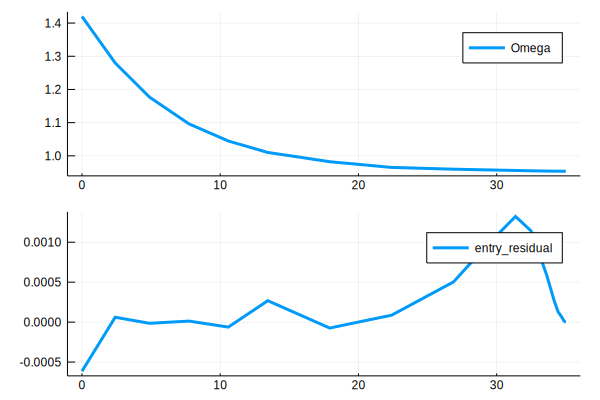

In [11]:
plot_Ω = plot(solved.t, solved.Ω, label = "Omega", lw = 3)
plot_residual = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot_Ω, plot_residual, layout = (2,1))

## Primary Plots

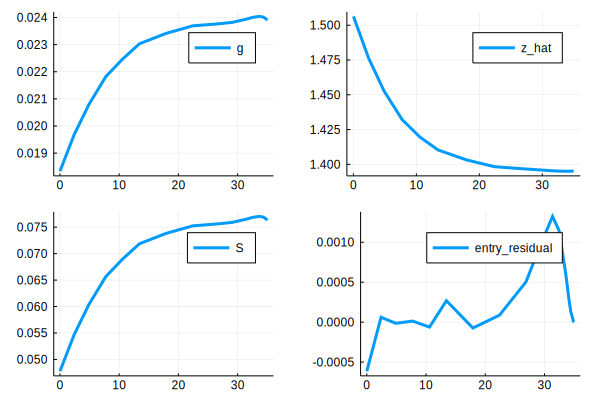

In [12]:
plot1 = plot(solved.t, solved.g, label = "g", lw = 3)
plot2 = plot(solved.t, solved.z_hat, label = "z_hat", lw = 3)
plot3 = plot(solved.t, solved.S, label = "S", lw = 3)
plot4 = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2))

## Static Equations

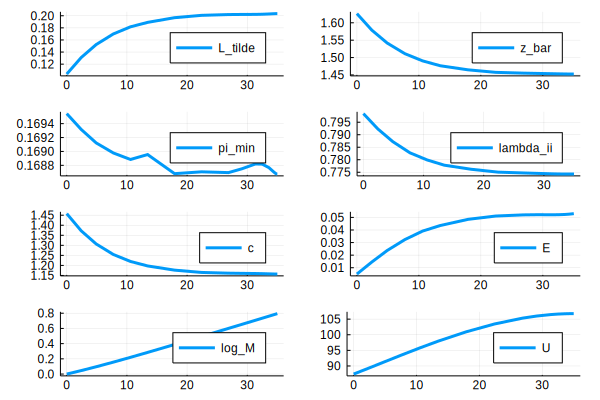

In [13]:
plot1 = plot(solved.t, solved.L_tilde, label = "L_tilde", lw = 3)
plot2 = plot(solved.t, solved.z_bar, label = "z_bar", lw = 3)
plot3 = plot(solved.t, solved.π_min, label = "pi_min", lw = 3)
plot4 = plot(solved.t, solved.λ_ii, label = "lambda_ii", lw = 3)
plot5 = plot(solved.t, solved.c, label = "c", lw = 3)
plot6 = plot(solved.t, solved.E, label = "E", lw = 3)
plot7 = plot(solved.t, solved.log_M, label = "log_M", lw = 3)
plot8 = plot(solved.t, solved.U, label = "U", lw = 3)
plot9 = plot(z_grid, v_hat_t0, label = "v_hat at t = 0", lw = 3)
plot(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, layout=(4,2))

# Welfare analysis

### `log_M(t)`

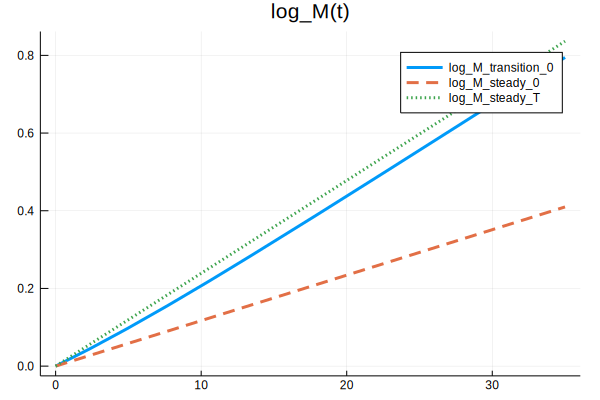

In [14]:
# define log_M with steady state g
log_M_steady_0(t) = stationary_sol_0.g * t
log_M_steady_T(t) = stationary_sol.g * t

# generate the plot!
plot(solved.t, 
    [solved.log_M, log_M_steady_0, log_M_steady_T], 
    label = ["log_M_transition_0", "log_M_steady_0", "log_M_steady_T"] ,
    title = "log_M(t)", linestyle = :auto, lw = 3)

### `Ω(t)`

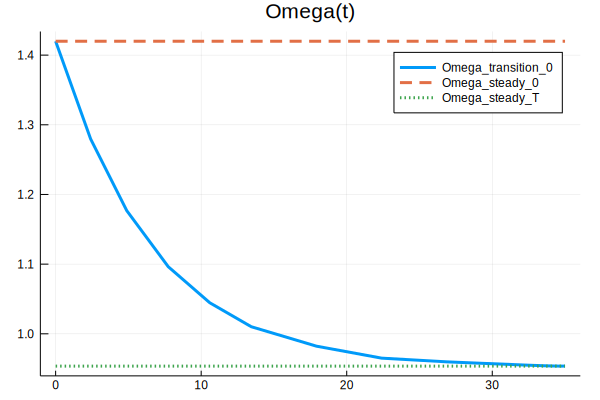

In [15]:
# define Ω function (constant)
Ω_steady_0(t) = stationary_sol_0.Ω
Ω_steady_T(t) = stationary_sol.Ω

# generate the plot!
plot(solved.t, 
    [solved.Ω, Ω_steady_0, Ω_steady_T], 
    label = ["Omega_transition_0", "Omega_steady_0", "Omega_steady_T"] ,
    title = "Omega(t)", linestyle = :auto, lw = 3)

### `c(t)`

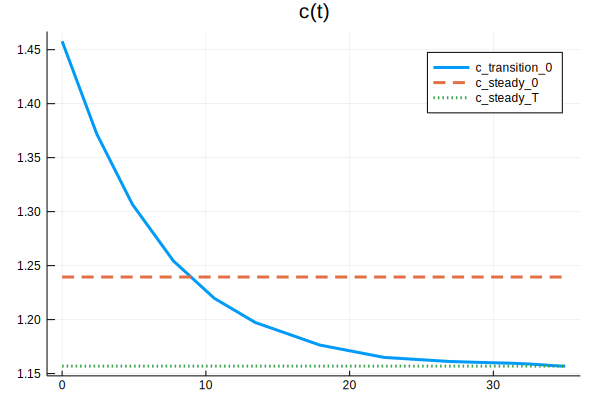

In [16]:
# define c function (constant)
c_steady_0(t) = stationary_sol_0.c
c_steady_T(t) = stationary_sol.c

# generate the plot!
plot(solved.t, 
    [solved.c, c_steady_0, c_steady_T], 
    label = ["c_transition_0", "c_steady_0", "c_steady_T"] ,
    title = "c(t)", linestyle = :auto, lw = 3)

### `U(t)`

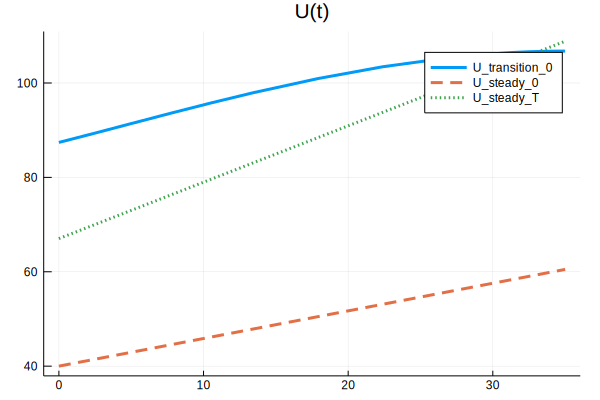

In [17]:
# # define c function (constant)
# ρ = params.ρ
# T = solved.t[end]
# U_steady_0(t) = (ρ*(log(stationary_sol_0.c + stationary_sol_0.g * t)) + stationary_sol_0.g)/(ρ^2)
# U_steady_T(t) = (ρ*(log(stationary_sol.c) + stationary_sol.g * t) + stationary_sol.g)/(ρ^2)
# U_steady_T(t) = (ρ*(log(stationary_sol.c) * stationary_sol.g*t) + stationary_sol.g) / (ρ^2)
# generate the plot!
plot(solved.t, 
    [solved.U, stationary_sol_0.U_bar, stationary_sol.U_bar], 
    label = ["U_transition_0", "U_steady_0", "U_steady_T"] ,
    title = "U(t)", linestyle = :auto, lw = 3)

## Consumption equivalent for search threshold (`M(0)`)
See computational appendix for details.

### `M(0)` by two steady states (autarky and steady state at `T`)

In [18]:
T = solved.t[end]
M_0 = exp(params.ρ*(stationary_sol.U_bar(T) - stationary_sol_0.U_bar(T)))

2.6301582781247967

### `M(0)` by autarky and transition from `t=0`

In [19]:
T = solved.t[end]
M_0 = exp(params.ρ*(solved.U[1] - stationary_sol_0.U_bar(T)))

1.7130300106031136